In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

For now I will work with the total relationships. I load the csv in a pandas dataframe:

In [12]:
rel_path = Path.cwd() / 'Relationships'

relationships_pd = pd.read_csv(rel_path.as_posix()+ '/' +'total_relationships.csv', index_col=0)

In [19]:
relationships_pd.loc[relationships_pd.source=='Principal']

,source,target,weight
309,Principal,Principal,2


Now we can create a network by [using the relationship dataframe as edgelist](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) and the weight as an edge attribute to show relationship strength:

In [23]:
G = nx.from_pandas_edgelist(relationships_pd,
                           source='source',
                           target='target',
                           edge_attr='weight',
                           create_using=nx.Graph())

Initial network statistics, number of nodes, edges, etc:

In [24]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 41
Number of edges: 384


Simple visualisation for the network:

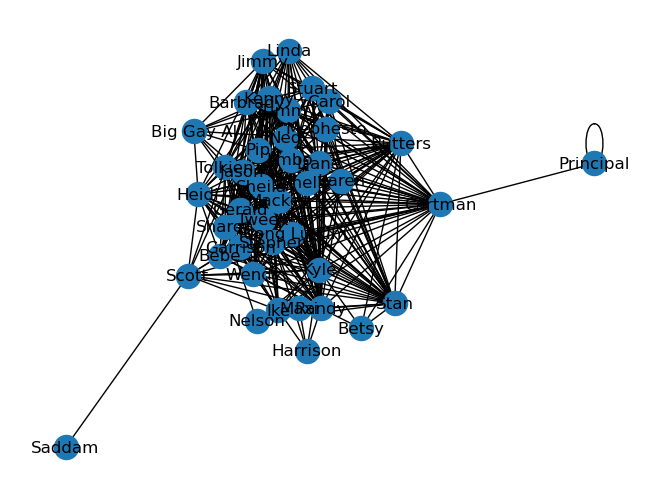

In [25]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [26]:
# I can see a self-reffering node. I can clear it out
for edge in G.edges():
    if edge[0]==edge[1]:
        print(edge)
        G.remove_edge(*edge)

('Principal', 'Principal')


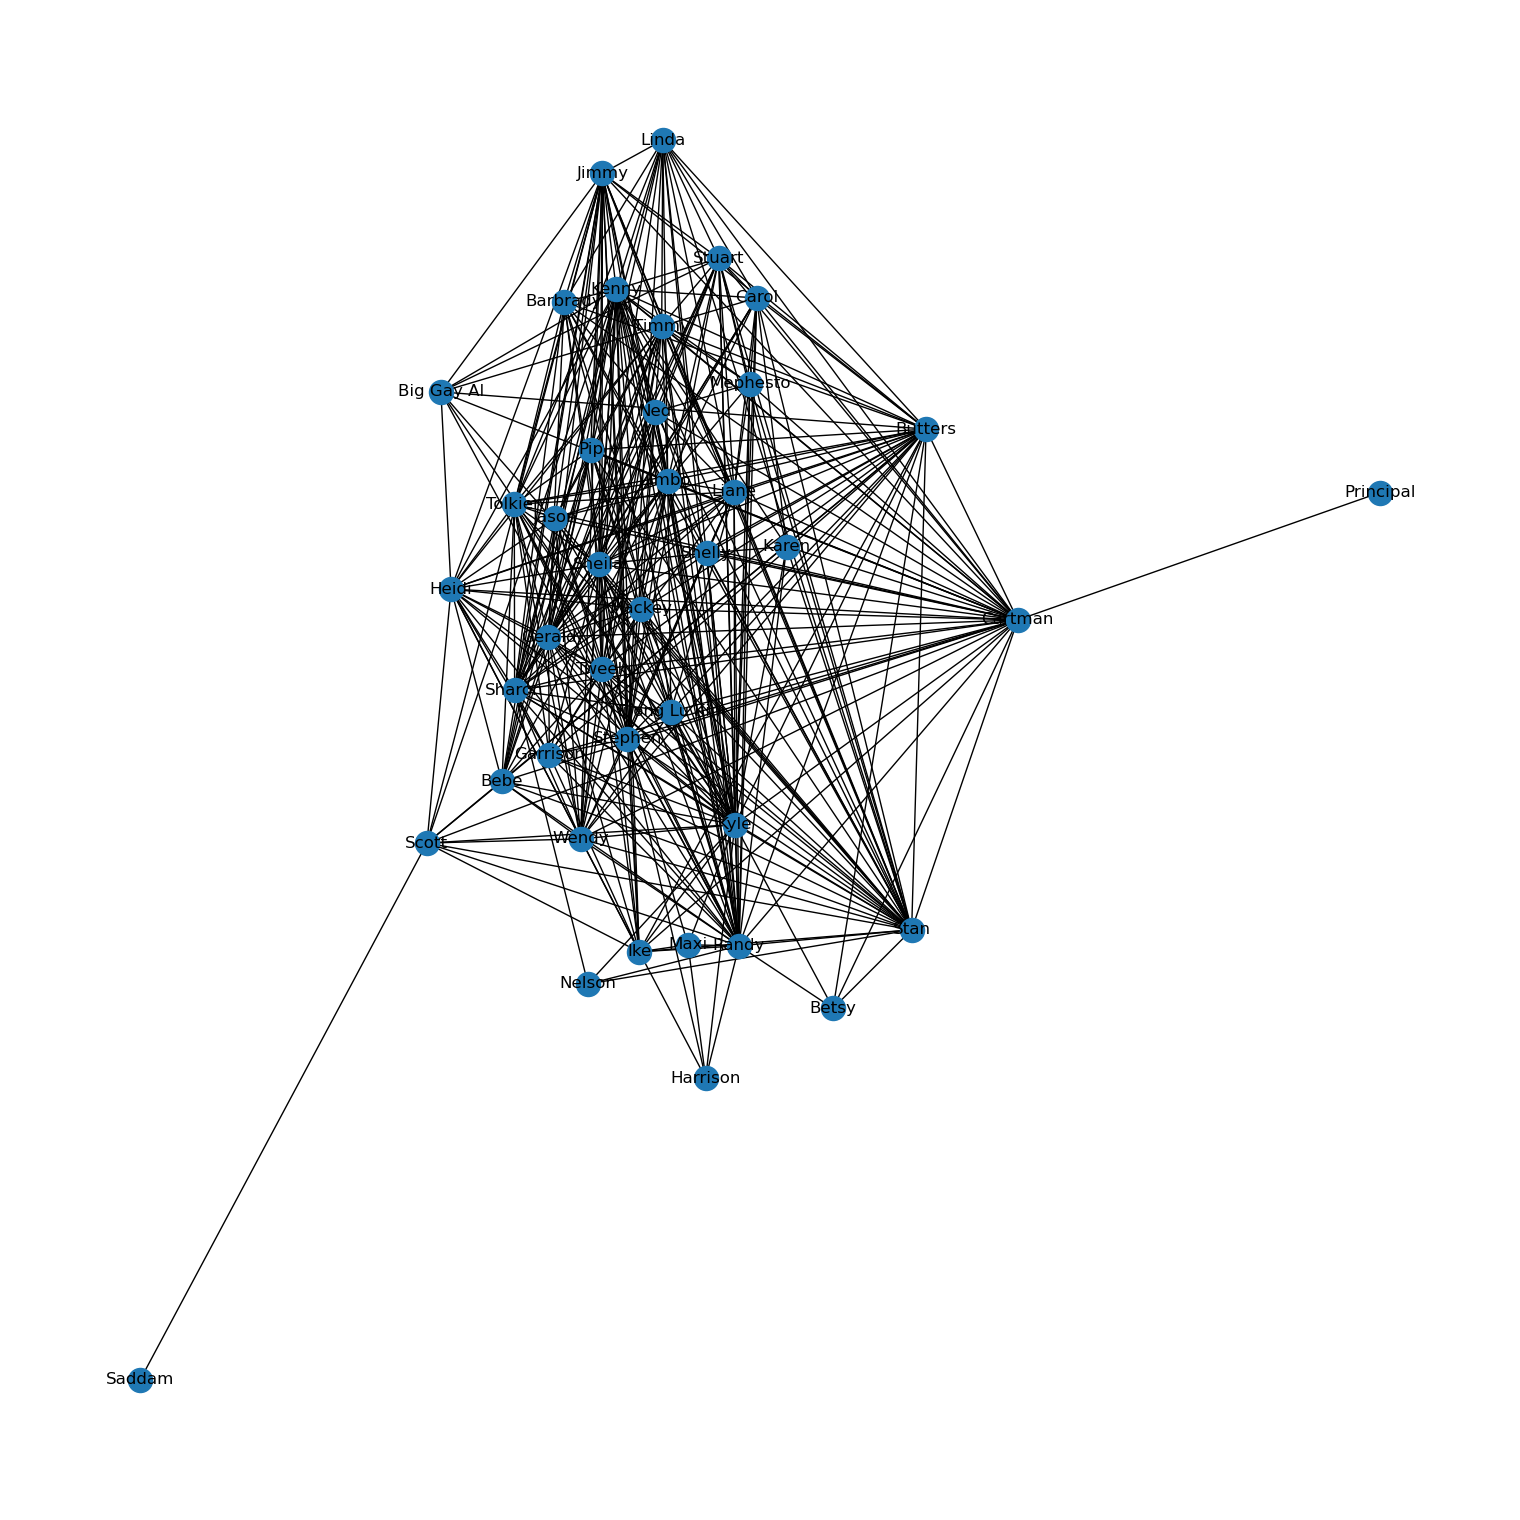

In [29]:
fig = plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

I have also found this [library](https://pyvis.readthedocs.io/en/latest/) that can be used with networkx and also provides nice visuals. I used code from the [tutorial](https://pyvis.readthedocs.io/en/latest/tutorial.html).

In [30]:
!pip install pyvis
from pyvis.network import Network

     -------------------------------------- 748.9/748.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755835 sha256=a9582055803ade12bf8380ba01948e25242fdd0526a9aa8ed04d434cf038d9d7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\55\7b\4b\dc896cf96ad07e0dc92d30e1984ab583c0d0feec208756e2b2
Successfully built pyvis


In [33]:
net = Network(notebook=True, width='1000px', height='700px',)
net.from_nx(G)
# net.show('south_park.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [34]:
degrees_dict = dict(G.degree)

In [35]:
degrees_dict

{'Kyle': 38,
 'Stan': 36,
 'Cartman': 36,
 'Ike': 17,
 'Kenny': 32,
 'Jason': 15,
 'Wendy': 22,
 'Liane': 24,
 'Jimbo': 27,
 'Ned': 14,
 'Randy': 37,
 'Pip': 16,
 'Big Gay Al': 10,
 'Shelly': 11,
 'Mephesto': 11,
 'Sharon': 26,
 'Sheila': 26,
 'Bebe': 17,
 'Carol': 16,
 'Stuart': 20,
 'Gerald': 28,
 'Saddam': 1,
 'Scott': 12,
 'Barbrady': 15,
 'Tweek': 21,
 'Tolkien': 23,
 'Jimmy': 26,
 'Butters': 31,
 'Mackey': 12,
 'Timmy': 25,
 'Heidi': 22,
 'Linda': 18,
 'Stephen': 26,
 'Tuong Lu Kim': 13,
 'Karen': 8,
 'Nelson': 4,
 'Principal': 1,
 'Garrison': 14,
 'Betsy': 5,
 'Harrison': 5,
 'Maxi': 5}